In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')

In [3]:
train=pd.read_csv('titanic_train.csv')
test=pd.read_csv('titanic_test.csv')
answers=pd.read_csv('titanic_answers.csv')

In [4]:
test=pd.concat([test,answers['Survived']],axis=1)

In [5]:
df=pd.concat([train,test],ignore_index=True)

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
print('NAN')
for col in df.columns:
    if df[col].isna().sum()>0:
        print(col,df[col].isna().sum())

NAN
Age 263
Fare 1
Cabin 1014
Embarked 2


In [8]:
df=df.drop(columns=['PassengerId','Name'],errors='ignore')

In [9]:
df['TicketN']=df['Ticket'].apply(lambda x:x.split(' ')[-1] if x!='LINE' else None)
df['TicketN']=df['TicketN'].astype(float)

df=df.drop(columns=['Ticket'],errors='ignore')

In [10]:
df['Cabin']=df['Cabin'].str[0]

In [11]:
df['Cabin'].value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Cabin']=le.fit_transform(df['Cabin'])

In [13]:
print('NAN')
for col in df.columns:
    if df[col].isna().sum()>0:
        print(col,df[col].isna().sum())

NAN
Age 263
Fare 1
Embarked 2
TicketN 4


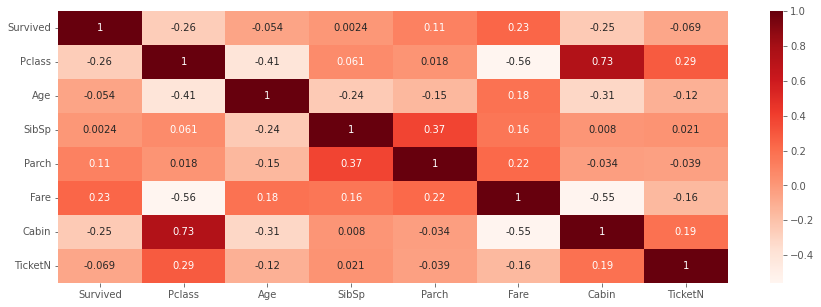

In [14]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap='Reds')
plt.show()

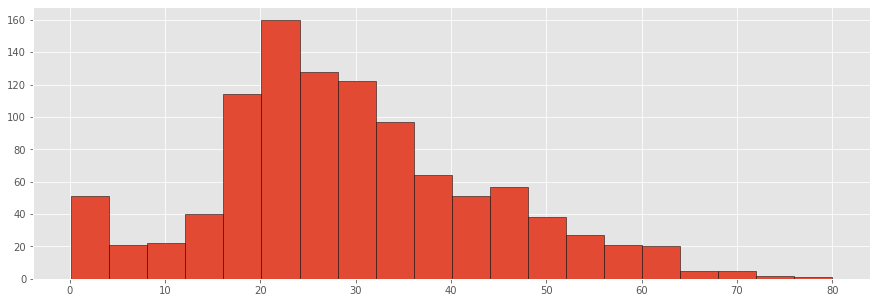

Median age 28.0
Average age 29.881137667304014


In [15]:
df['Age'].hist(bins=20,figsize=(15,5),ec='black')
plt.show()

print('Median age',df['Age'].median())
print('Average age',df['Age'].mean())

In [16]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,TicketN
0,0,3,male,22.0,1,0,7.2500,8,S,21171.0
1,1,1,female,38.0,1,0,71.2833,2,C,17599.0
2,1,3,female,26.0,0,0,7.9250,8,S,3101282.0
3,1,1,female,35.0,1,0,53.1000,2,S,113803.0
4,0,3,male,35.0,0,0,8.0500,8,S,373450.0
...,...,...,...,...,...,...,...,...,...,...
1304,0,3,male,NaN,0,0,8.0500,8,S,3236.0
1305,1,1,female,39.0,0,0,108.9000,2,C,17758.0
1306,0,3,male,38.5,0,0,7.2500,8,S,3101262.0
1307,0,3,male,NaN,0,0,8.0500,8,S,359309.0


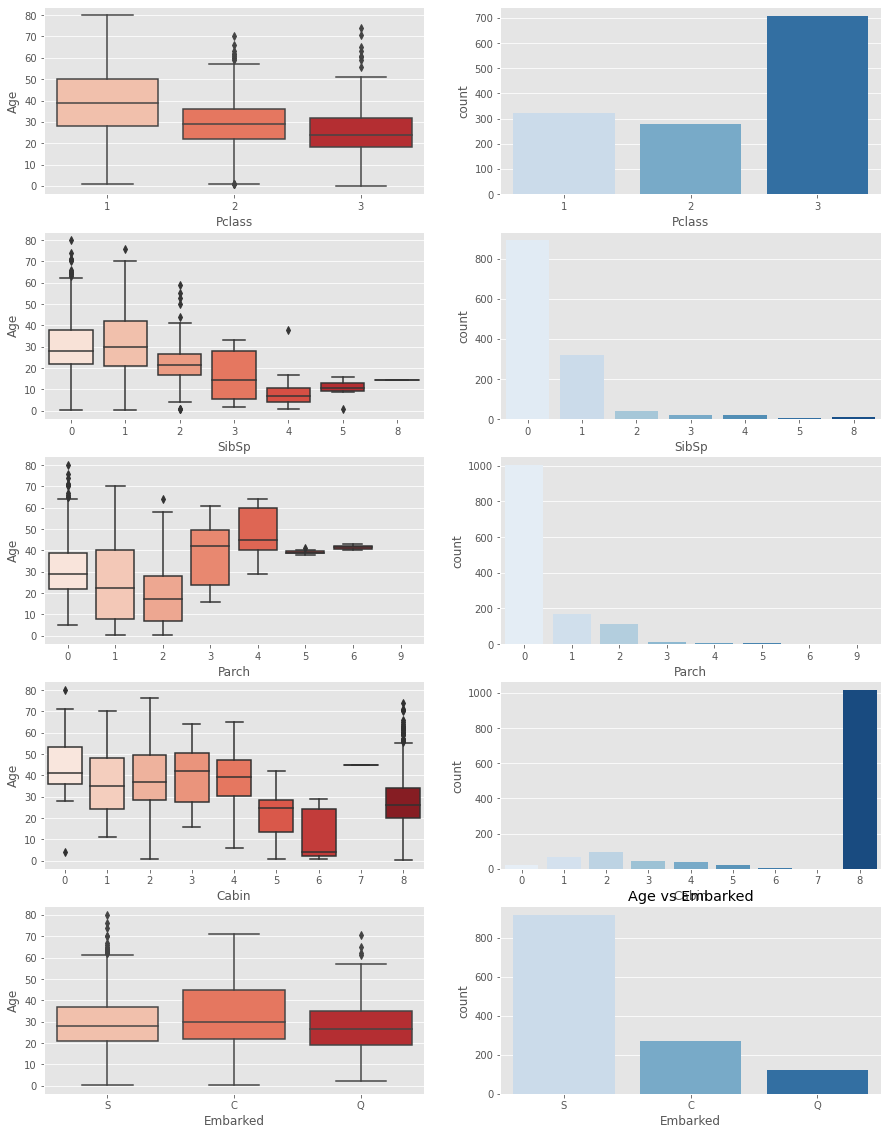

In [17]:
cols=['Pclass','SibSp','Parch','Cabin','Embarked']
fig,axes=plt.subplots(5,2,figsize=(15,20))

for i,col in enumerate(cols):
    sns.boxplot(data=df,x=col,y='Age',ax=axes[i,0],palette='Reds')
    sns.countplot(data=df,x=col,ax=axes[i,1],palette='Blues')
    plt.title(f'Age vs {col}')
plt.show()

In [18]:
df.corr()['Age'].sort_values(ascending=False)

Age         1.000000
Fare        0.178740
Survived   -0.053695
TicketN    -0.118940
Parch      -0.150917
SibSp      -0.243699
Cabin      -0.312138
Pclass     -0.408106
Name: Age, dtype: float64

In [39]:
### features that most affect the age are Pclass and Parch 

In [19]:
df.pivot_table(index='Parch',columns='Pclass',values='Age',aggfunc='mean').style.background_gradient()

Pclass,1,2,3
Parch,,,
0,40.164216,32.102632,27.431818
1,42.142857,21.941860,14.500000
2,23.330370,21.770000,14.811111
3,54.500000,38.000000,29.333333
4,62.000000,nan,38.000000
5,nan,nan,39.333333
6,nan,nan,41.500000


In [20]:
df['Age']=df.groupby(['Pclass','Parch'])['Age'].transform(lambda x:x.fillna(x.median()))

C:\Users\berid\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [21]:
df=df.dropna()

In [22]:
for col in df.select_dtypes('object').columns:
    dummies=pd.get_dummies(df[col],prefix=col)
    df=df.drop(columns=col)
    df=pd.concat([df,dummies],axis=1)

In [23]:
X=df.drop(columns='Survived')
Y=df['Survived']

In [24]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [25]:
xtrain,xtest,ytrain,ytest=X[:891],X[891:],Y[:891],Y[891:]

model=XGBClassifier()

params={ 'learning_rate':[0.01,0.02,0.05], 'max_depth':[2,3,5], 'n_estimators':[1000,2000,5000] }

gs=GridSearchCV(model,params,n_jobs=1,verbose=10,cv=3) 

gs.fit(xtrain,ytrain)


In [26]:
#gs.best_params_
#{'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 1000}

In [27]:
model=XGBClassifier(learning_rate=0.02,max_depth=2,n_estimators=1000)

In [28]:
model.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.02, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [29]:
train_prediction=model.predict(xtrain)
test_prediction=model.predict(xtest)

In [30]:
train_accuracy=metrics.accuracy_score(ytrain,train_prediction)
test_accuracy=metrics.accuracy_score(ytest,test_prediction)

print('train accuracy', train_accuracy)
print('test accuracy', test_accuracy)

train accuracy 0.8888888888888888
test accuracy 0.8997555012224939
